In [2]:
import cv2
from deepface import DeepFace
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [3]:
cap = cv2.VideoCapture(0)
ret, frame = cap.read()
cv2.imshow('Press any key to capture', frame)
cv2.waitKey(0)
cv2.destroyAllWindows()
cap.release()


In [4]:
cv2.imwrite("captured_image.jpg", frame)

True

In [5]:
result = DeepFace.analyze(img_path="captured_image.jpg", actions=['emotion'], enforce_detection=False)
print("Detected Emotion:", result[0]['dominant_emotion'])

25-07-04 20:42:02 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\mudav\.deepface\weights\facial_expression_model_weights.h5
100%|██████████████████████████████████████████████████████████████████████████████| 5.98M/5.98M [00:55<00:00, 109kB/s]


Detected Emotion: neutral


In [6]:
emotion = result[0]['dominant_emotion']

tips = {
    "happy": "Keep smiling! You're glowing today 😊",
    "sad": "It's okay to feel down. Take a walk or talk to someone 💙",
    "angry": "Take a deep breath and count to 10 🔥",
    "surprise": "Something unexpected? Stay flexible! ✨",
    "neutral": "Stay calm and balanced today 🤍",
    "fear": "Try to ground yourself. You’re safe 🧘",
    "disgust": "Shift focus. Watch something relaxing 🍃"
}

print("Tip for you:", tips.get(emotion, "Stay strong and keep going 💪"))


Tip for you: Stay calm and balanced today 🤍


In [11]:
import os
log_data = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'emotion': emotion}
df = pd.DataFrame([log_data])
df.to_csv("emotion_log.csv", mode='a', header=not os.path.isfile("emotion_log.csv"), index=False)

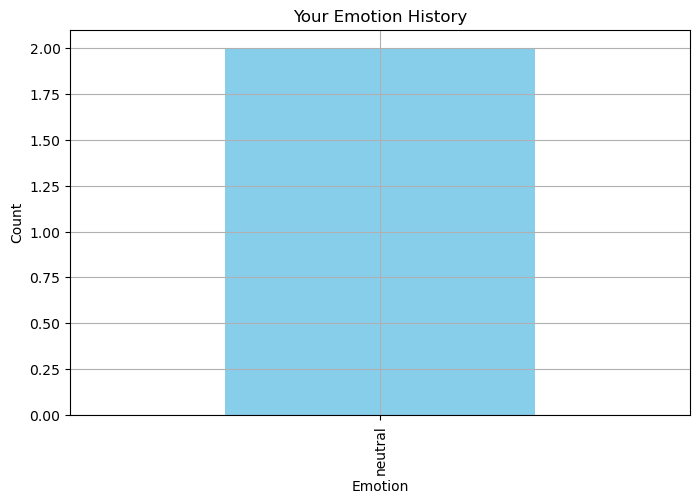

In [12]:
data = pd.read_csv("emotion_log.csv")
emotion_counts = data['emotion'].value_counts()
plt.figure(figsize=(8,5))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Your Emotion History")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.grid(True)
plt.show()

In [13]:
today = pd.Timestamp.now().strftime('%Y-%m-%d')
today_data = data[data['timestamp'].str.contains(today)]
if not today_data.empty:
    today_top = today_data['emotion'].value_counts().idxmax()
    print("Today's Mood Summary:", today_top)


Today's Mood Summary: neutral


In [14]:
import tensorflow as tf
print(tf.__version__)

2.19.0
